In [1]:
import warnings
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from game import Game
from models import Player, Land, MockPlayer
from utils.fc import get_df_over_increase, create_mock_game, simulation, merge_dfs, get_diff, get_df_columns_mean, get_df_columns_sum
from utils.mpl import plot_scatter, plot_line_with_scatter

In [2]:
df = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='vampirao', rarity='usual', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='vampirao', rarity='unusual', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='vampirao', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='vampirao', rarity='epic', group=False)
df = merge_dfs(dfs=[df, df1, df2, df3, df4], column='energy', pk='day', limits=(20,30))


# COMPARING ATTACKS BETWEEN RARITYS

In [3]:
df

,day,no_hero,usual,unusual,rare,epic
20,11.0,28.76,10.42,-24.60,-54.30,-71.05
21,11.0,29.41,8.47,-23.32,-54.49,-72.93
22,12.0,29.17,3.21,-17.12,-50.87,-76.29
23,12.0,26.88,2.17,-19.78,-51.30,-70.15
24,13.0,30.61,9.66,-23.54,-48.08,-72.42
25,13.0,27.25,3.34,-15.28,-38.52,-74.09
26,14.0,27.80,0.20,-16.65,-50.88,-71.07
27,14.0,30.18,2.81,-19.58,-52.26,-70.04
28,15.0,28.02,3.95,-18.07,-47.63,-72.39
29,15.0,27.66,8.02,-16.47,-47.30,-70.90


# TOTAL ENERGY AFTER 10 ATTACKS

In [4]:
df_sum = get_df_columns_sum(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_sum

,no_hero,usual,unusual,rare,epic
0,285.74,52.25,-194.41,-495.63,-721.33


Text(0.5, 1.0, 'Total Energy Spent After 10 Attacks')

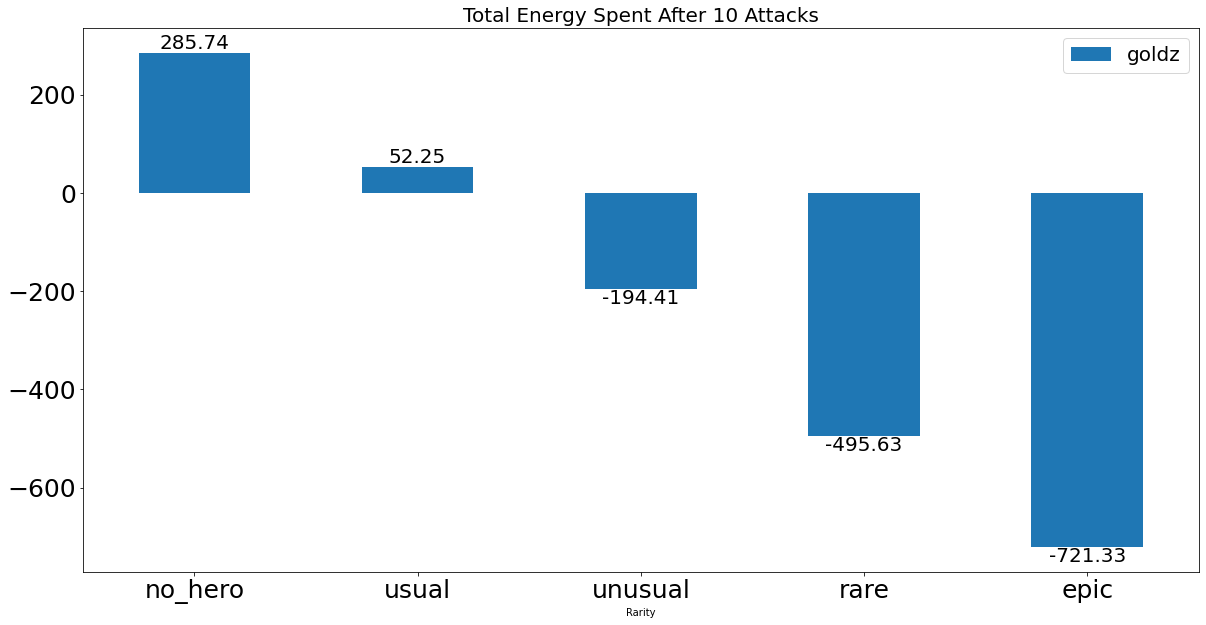

In [5]:
df_sum = pd.DataFrame({'heroes':df_sum.columns, 'goldz':df_sum.iloc[0].to_list()})

ax = df_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Total Energy Spent After 10 Attacks", fontsize=20)

# ENERGY AVERAGE ON EACH ATTACK

In [6]:
df_mean = get_df_columns_mean(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_mean

,no_hero,usual,unusual,rare,epic
0,28.574,5.225,-19.441,-49.563,-72.133


Text(0.5, 1.0, 'Energy Average on Each attack')

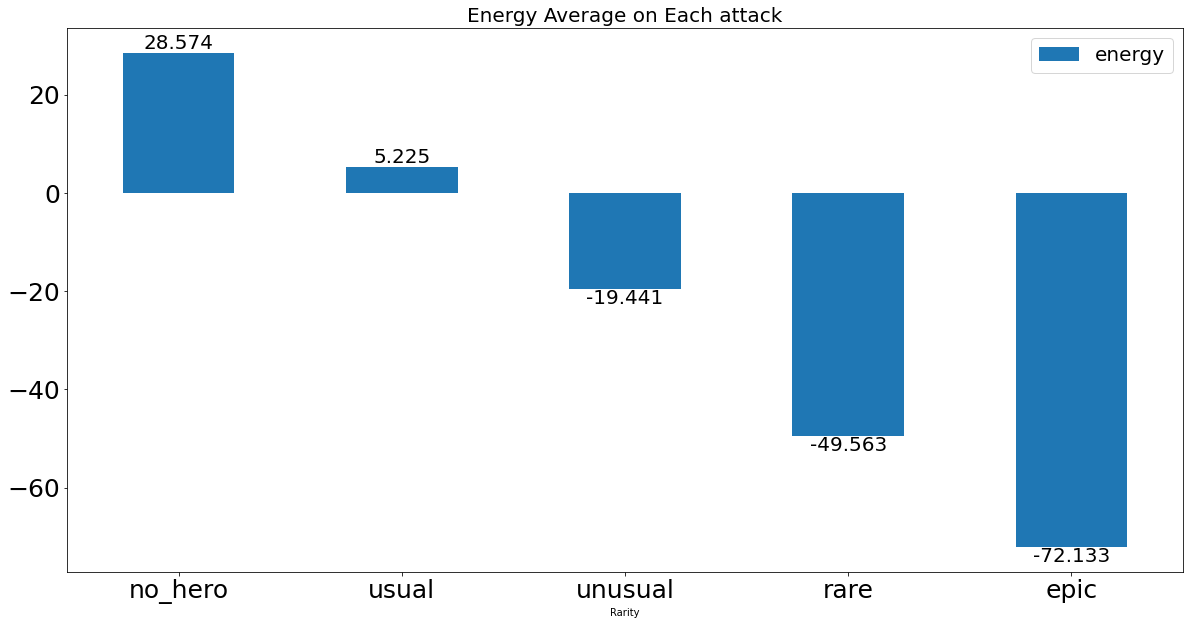

In [7]:

df_mean = pd.DataFrame({'heroes':df_mean.columns, 'energy':df_mean.iloc[0].to_list()})

ax = df_mean.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Energy Average on Each attack", fontsize=20)

# ENERGY DIFFERENCE COMPARED TO NO HERO

In [8]:
df = get_diff(df=df)
df

,day,usual,unusual,rare,epic
20,11.0,-18.34,-53.36,-83.06,-99.81
21,11.0,-20.94,-52.73,-83.90,-102.34
22,12.0,-25.96,-46.29,-80.04,-105.46
23,12.0,-24.71,-46.66,-78.18,-97.03
24,13.0,-20.95,-54.15,-78.69,-103.03
25,13.0,-23.91,-42.53,-65.77,-101.34
26,14.0,-27.60,-44.45,-78.68,-98.87
27,14.0,-27.37,-49.76,-82.44,-100.22
28,15.0,-24.07,-46.09,-75.65,-100.41
29,15.0,-19.64,-44.13,-74.96,-98.56


# TOTAL ENERGY SPENT COMPARED TO NO HERO

In [9]:
df_diff_sum = get_df_columns_sum(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_sum

,usual,unusual,rare,epic
0,-233.49,-480.15,-781.37,-1007.07


Text(0.5, 1.0, 'Total Diff Energy Compared to No Hero')

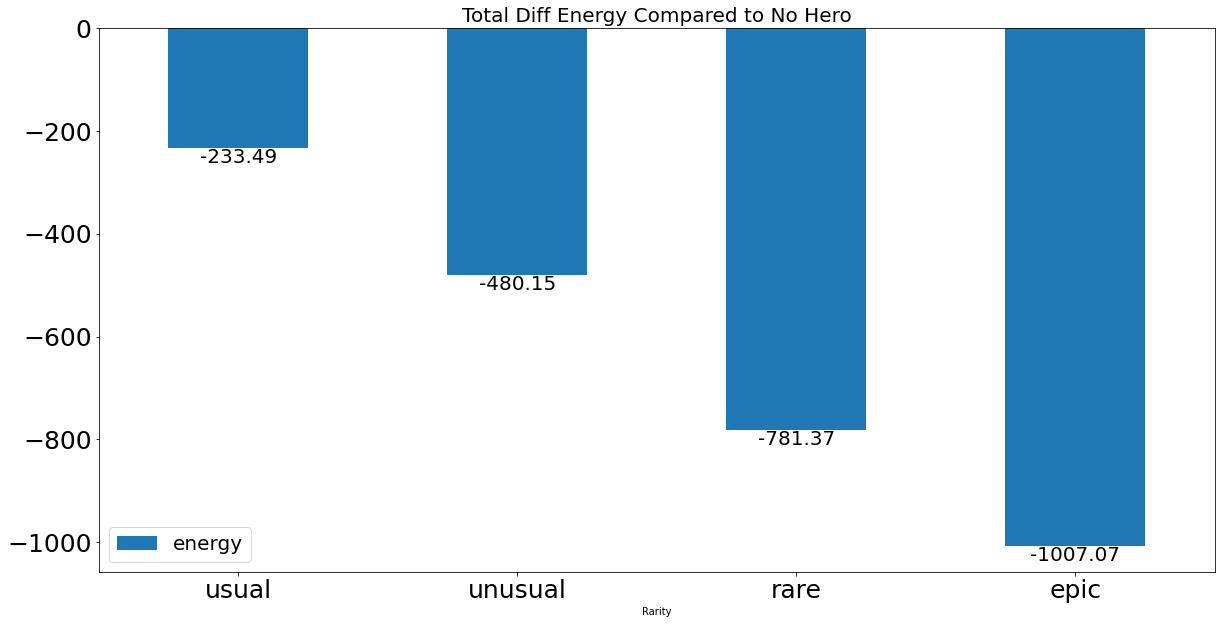

In [10]:
df_diff_sum = pd.DataFrame({'heroes':df_diff_sum.columns, 'energy':df_diff_sum.iloc[0].to_list()})

ax = df_diff_sum.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Total Diff Energy Compared to No Hero", fontsize=20)

# ENERGY DIFFERENCE SPENT PER ATTACK COMPARED TO NO HERO


In [11]:
df_diff_mean = get_df_columns_mean(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_mean

,usual,unusual,rare,epic
0,-23.349,-48.015,-78.137,-100.707


Text(0.5, 1.0, 'Diff Energy Average per Attack')

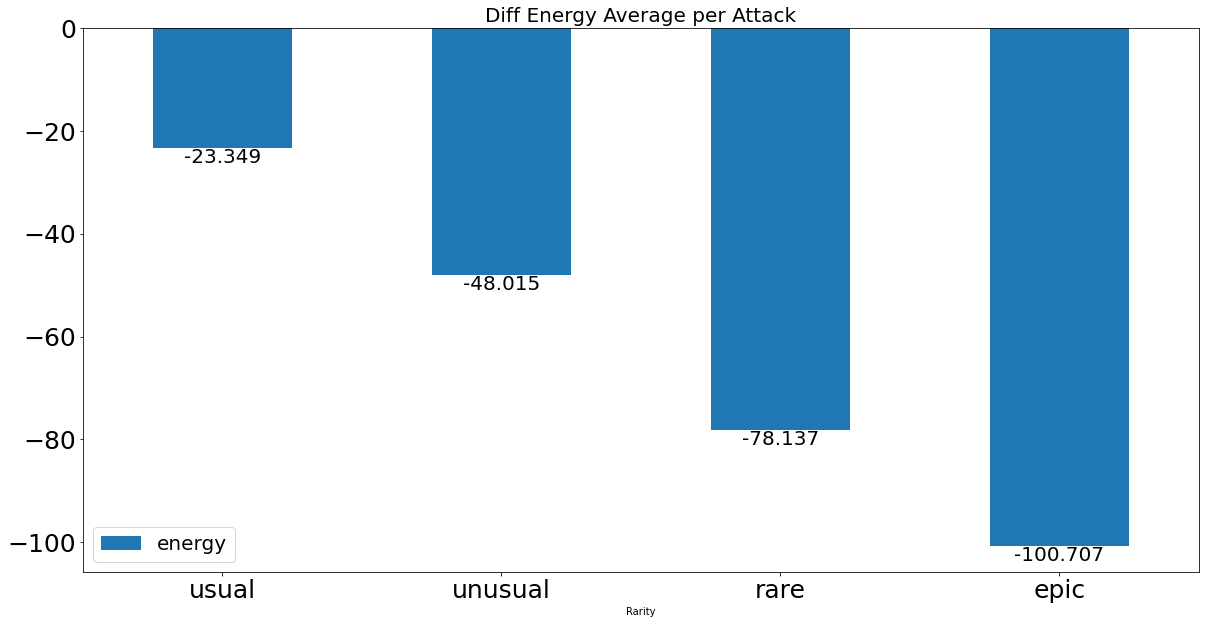

In [12]:
df_diff_mean = pd.DataFrame({'heroes':df_diff_mean.columns, 'energy':df_diff_mean.iloc[0].to_list()})

ax = df_diff_mean.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Diff Energy Average per Attack", fontsize=20)